![A soccer pitch for an international match.](soccer-pitch.jpg)

An investigation was conducted to determine whether more goals are scored in women’s international soccer matches compared to men’s. The analysis focused on official FIFA World Cup matches (excluding qualifiers) played since January 1, 2002, to account for the evolving nature of the sport and variations across tournaments.

Historical match data for men’s and women’s international soccer were collected from a reliable online source and organized into two datasets: women_results.csv and men_results.csv. A statistical hypothesis test was performed at a 10% significance level with the following hypotheses:

Null Hypothesis ($H_0$): The mean number of goals scored in women’s matches is the same as in men’s matches.
Alternative Hypothesis ($H_A$): The mean number of goals scored in women’s matches is greater than in men’s.

The purpose of this project was to provide a data-driven analysis of scoring patterns in international soccer, offering insights that could engage soccer enthusiasts and enhance sports journalism.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int

/var/folders/zy/s1ckvr7j4zqdbfy1pxp2ymhc0000gn/T/ipykernel_12022/471415777.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_worldcup['date'] = pd.to_datetime(men_worldcup['date'])
/var/folders/zy/s1ckvr7j4zqdbfy1pxp2ymhc0000gn/T/ipykernel_12022/471415777.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_worldcup['date'] = pd.to_datetime(women_worldcup['date'])


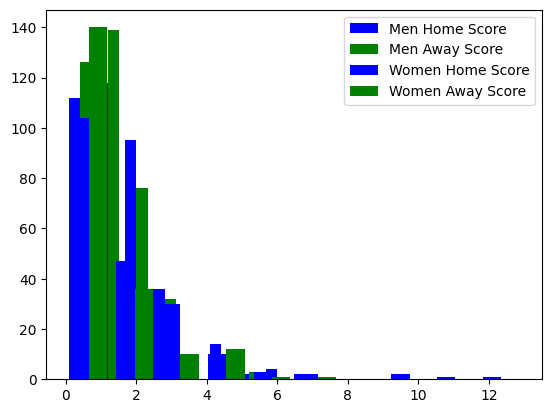

In [1]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

men_results = pd.read_csv('men_results.csv')
women_results = pd.read_csv('women_results.csv')

print(men_results.info())
print(women_results.info())

#print(men_results['tournament'].value_counts())
#print(women_results['tournament'].value_counts())

men_worldcup = men_results[men_results['tournament'] == 'FIFA World Cup']
women_worldcup = women_results[women_results['tournament'] == 'FIFA World Cup']

men_worldcup['date'] = pd.to_datetime(men_worldcup['date'])
women_worldcup['date'] = pd.to_datetime(women_worldcup['date'])

men_worldcup = men_worldcup[men_worldcup['date'] > '2002-01-01']
women_worldcup = women_worldcup[women_worldcup['date'] > '2002-01-01']

men_worldcup.head()

#Determining the type of hypothesis test:Wilcoxon-Mann-Whitney
#Determining if the data is normally distributed
plt.hist([men_worldcup['home_score'], men_worldcup['away_score']], color=['blue', 'green'], label=['Men Home Score', 'Men Away Score'])
plt.legend()

plt.hist([women_worldcup['home_score'], women_worldcup['away_score']], color=['blue', 'green'], label=['Women Home Score', 'Women Away Score'])
plt.legend()

men_women_worldcup = mannwhitneyu(x=women_worldcup['home_score'] + women_worldcup['away_score'], y=men_worldcup['home_score'] + men_worldcup['away_score'], alternative='greater')

p_val = men_women_worldcup.pvalue

result_dict = {"p_val": p_val, "result": "reject"}

print(result_dict)